In [1]:
import yoda
%matplotlib inline

import os
from yoda_helper import compare_yoda, compare_yoda_files

In [2]:
print yoda.__version__
print yoda.__file__

1.7.0
/Users/xju/Documents/Programs/rivet/local/lib/python2.7/site-packages/yoda/__init__.pyc


In [3]:
yoda.mplinit()

<module 'matplotlib' from '/Users/xju/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/__init__.pyc'>

In [37]:
%%writefile yoda_helper.py
def compare_yoda(ref, tuned_dict, options=None):
    """
    compare ref data with and tuned ones
    """
    if len(tuned_dict.values()) < 1:
        return 
    
    plotkeys = {
        "xlabel": "",
        "ylabel": "Events / Bin",
        "logY": True,
        "title": "validation",
        "ratioylabel": "Tuned / Ref",
        "errorbars": True, 
        "ratioymin": 0.1,
        "ratioymax": 2,
        'ratiogrid': True
    }
    
    if options is None:
        options = dict()
        
    tuned = tuned_dict.values()[0]
    
    output_dir = options.get('output_dir', "output")
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for key in sorted(tuned.keys()):
        hists_list = []
        try:
            ref_hist = ref['/REF'+key]
            ref_hist.setAnnotation("ratioref", True)
            ref_hist.setAnnotation("Title", "Ref. data")
        except KeyError:
            print "/REF"+key+" not found"
            break
            
        title = ref_hist.path.split('/')[-1]
        hists_list.append(ref_hist)
        plotkeys['xlabel'] = title
        
        for label, yoda_handle in tuned_dict.iteritems():
            tuned_hist = yoda_handle[key]            
            # print tuned_hist
            if tuned_hist:
                tuned_hist.setAnnotation("Title", label)
                hists_list.append(tuned_hist)
            else:
                print title," missed tuned data"
            
        out_name = output_dir+"/validation_"+title+".pdf"
        #yoda.plotting.plot(hists_list, outfile=out_name, plotkeys=plotkeys)
        yoda.plot(hists_list, outfile=out_name, **plotkeys)
        
def compare_yoda_files(ref_file, tuned_dict_files, options=None):
    tuned_dict = {}
    ref_data = yoda.read(ref_file)

    for key,value in tuned_dict_files.iteritems():
        tuned_dict[key] = yoda.read(value)
    
    compare_yoda(ref_data, tuned_dict, options)     

Overwriting yoda_helper.py


In [4]:
ATLAS_2014_I1268975_input = {
    "ref_file": "inputs/ATLAS_2014_I1268975/ATLAS_2014_I1268975.yoda",
    "tuned_dict_files": {
        "5 Obs": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_r0p4_first5.yoda",
        "All": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_allobservables.yoda",
        "5 Obs with weights": "inputs/ATLAS_2014_I1268975/ipolhistos_500k_r0p4_first5_diff_weights.yoda",
        "All 10m": "inputs/ATLAS_2014_I1268975/ipolhistos_10m_allobservables.yoda"
    },
    "options": {
        "output_dir": "output/ATLAS_2014_I1268975"
    }
}

In [5]:
compare_yoda_files(**ATLAS_2014_I1268975_input)

NameError: global name 'os' is not defined

In [9]:
def to_be_deleted():
    h1 = tuned_5_obs_data['/ATLAS_2014_I1268975/d01-x01-y05']
    h2 = ref_data['/REF/ATLAS_2014_I1268975/d01-x01-y05']
    h2.setAnnotation("ratioref", True)
    yoda.plotting.mplinit(fontsize=14)
    print yoda.plotting.plot.__doc__

In [10]:
def print_scater2D(h2d):
    for p in h2d.points:
        print p.x, p.y, p.xErrs, p.yErrAvg, p.errAvg(2)

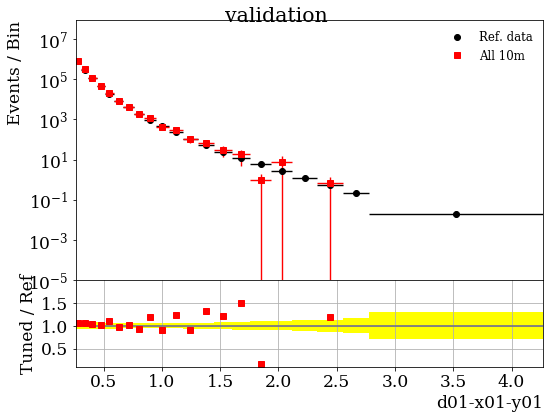

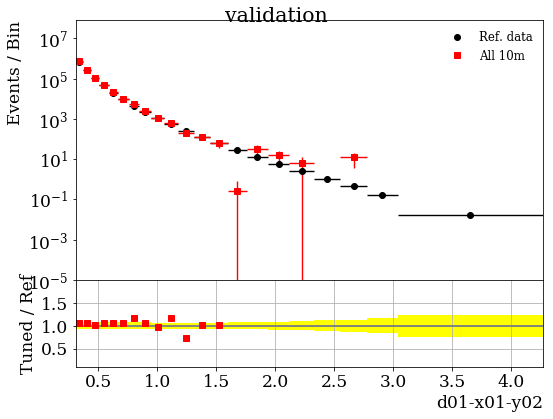

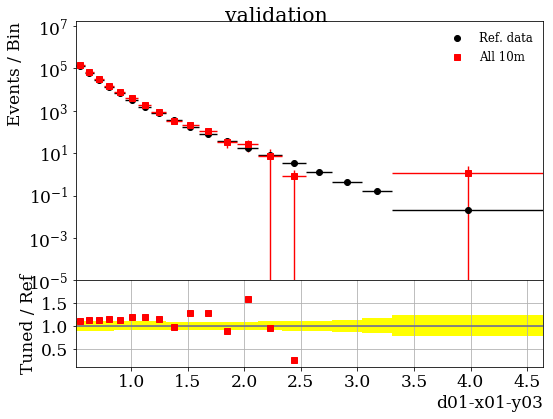

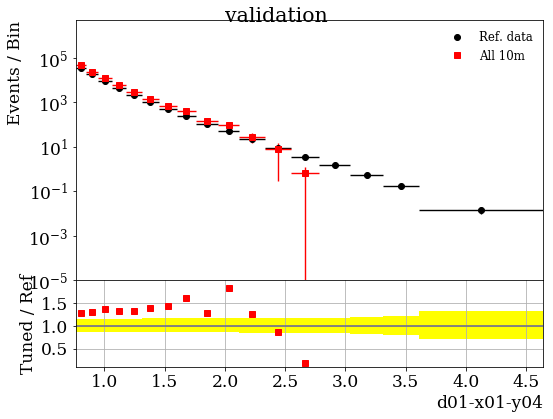

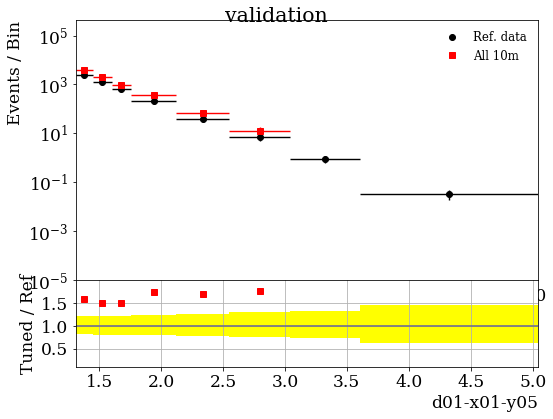

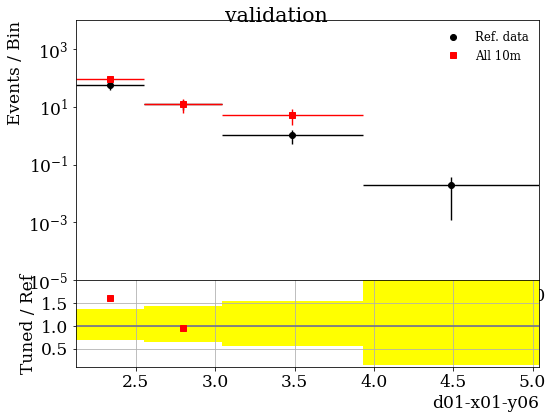

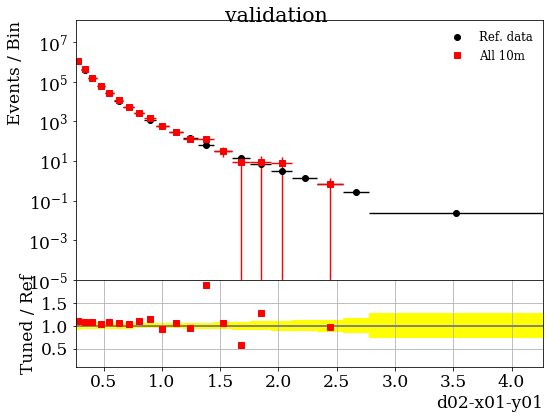

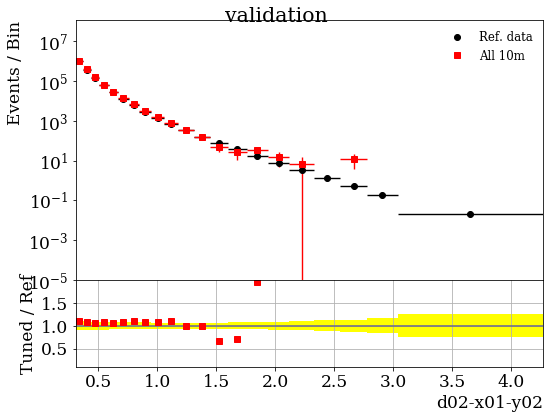

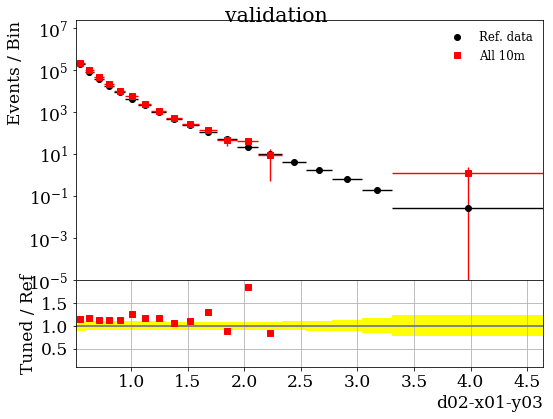

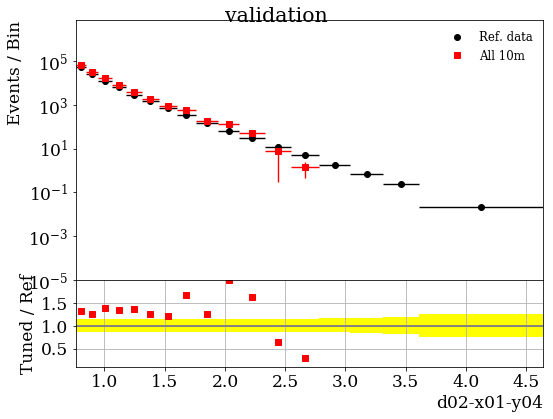

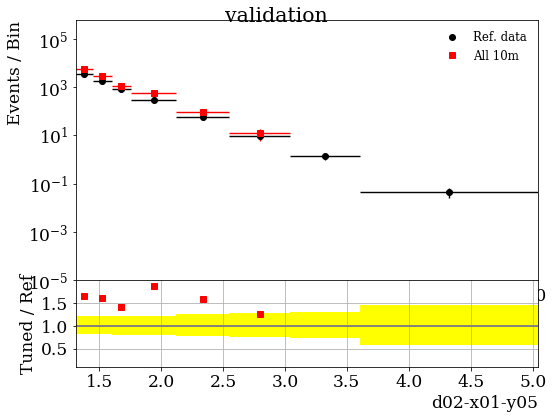

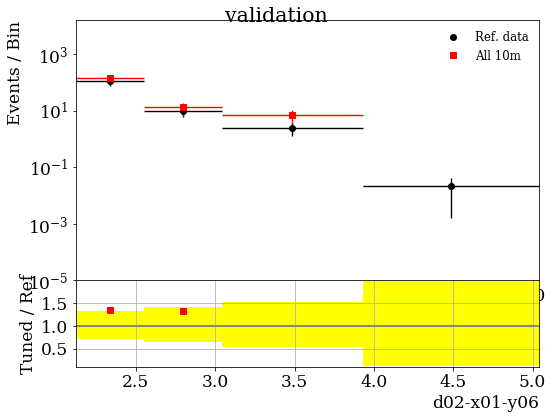

In [11]:
tuned_data = {
    "All 10m": tuned_all_obs_10mMC
}
compare_yoda(ref_data, tuned_data)